# Tarea-IPy-regresion-logistica

Esta tarea debe ser realizada en Python.

**Punto 1.--** Construya un gráfico de la función logistica

Automatically created module for IPython interactive environment


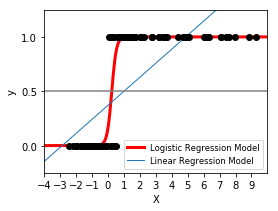

In [1]:
print(__doc__)


# Code source: Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.show()

**Punto 2.--** Aplique la regresión logística para construir clasificadores para los datos que hay en el archivo `data.dat`. Imprima los parámetros de cada uno de los clasificadores. Compare los resultados con los obtenidos usando R.

In [174]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

data    = pandas.read_table('data.dat',    sep = '\t', decimal = '.')
#C1 = data['t'].map(lambda x: 1 if x == 1 else 0)
data['C1']=data['t'] == 1
data['C2']=data['t'] == 2
data['C3']=data['t'] == 3

data=data.reset_index()

mC1 = smf.glm(formula='C1 ~ x1 + x2', data=data, family=sm.families.Binomial())
rC1 = mC1.fit()
print(rC1.params)

mC2 = smf.glm(formula='C2 ~ x1 + x2', data=data, family=sm.families.Binomial())
rC2 = mC2.fit()
print(rC2.params)

mC3 = smf.glm(formula='C3 ~ x1 + x2', data=data, family=sm.families.Binomial())
rC3 = mC3.fit()
print(rC3.params)

Intercept   -27.957943
x1            5.642595
x2            2.319189
dtype: float64
Intercept    35.548913
x1           -0.469803
x2           -9.295725
dtype: float64
Intercept    18.134183
x1           -4.257410
x2            6.137514
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:822: RuntimeWarning: invalid value encountered in true_divide
  (1 - mu) +


**Punto 3.--** Grafique los puntos pertenecientes a cada clase y las fronteras de decisión, que corresponden a la ecuación logística.

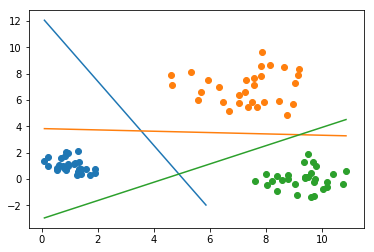

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plot
# ==============================
fig, ax = plt.subplots()
dataC1=data[data['t']==1]
ax.scatter(dataC1.x1, dataC1.x2)

dataC2=data[data['t']==2]
ax.scatter(dataC2.x1, dataC2.x2)

dataC3=data[data['t']==3]
ax.scatter(dataC3.x1, dataC3.x2)

x_min=min(data.x1)
x_max=max(data.x1)
y_min=min(data.x2)
y_max=max(data.x2)

# Grupo 1
c = -rC1.params[0] / rC1.params[2]
slope = -rC1.params[1] / rC1.params[2]

#x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*((x_max-5)-x_min)
ax.plot([x_min, (x_max-5)], [y_min, y_max])

# Grupo 2
c = -rC2.params[0] / rC2.params[2]
slope = -rC2.params[1] / rC2.params[2]

#x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max])

# Grupo 3
c = -rC3.params[0] / rC3.params[2]
slope = -rC3.params[1] / rC3.params[2]

#x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max])

#ax.set_xlim([x_min, x_max])

**Punto 4.--** Aplique la regresión logística al caso 'Enfermedades del corazón'.

----